In [1]:
import pickle
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

/home/cmu/miniconda3/envs/vllm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("d1shs0ap/DeepScaleR-Preview-Dataset", split="train").select(range(2048))

In [13]:
def plot_length_vs_reward(dataset, length_column='length'):

    length_by_difficulty = []

    for i in range(0, 17):
        subset = dataset.filter(lambda x: x['reward'] == i / 16)
        length_by_difficulty.append(sum(subset[length_column]) / len(subset))
    
    sns.lineplot(x=[i / 16 for i in range(0, 17)], y=length_by_difficulty, label=length_column)

In [9]:
for context_length in ['2k', '4k', '8k']:
    for checkpoint in [100, 200, 300, 400, 500]:
        if context_length == '2k' and checkpoint < 400:
            continue
        with open(f"/home/cmu/deepscaler/data/pass_at_k/pass_at_k_deepscaler-1.5b-{context_length}_{checkpoint}.pkl", "rb") as f:
            rollouts = pickle.load(f)
        
        lengths = []
        for i in range(len(rollouts)):
            rollout = rollouts[i]
            total_length = 0
            for output in rollout.outputs:
                total_length += len(output.token_ids)
            lengths.append(total_length / len(rollout.outputs))

        dataset = dataset.add_column(f'length_{context_length}_{checkpoint}', lengths)

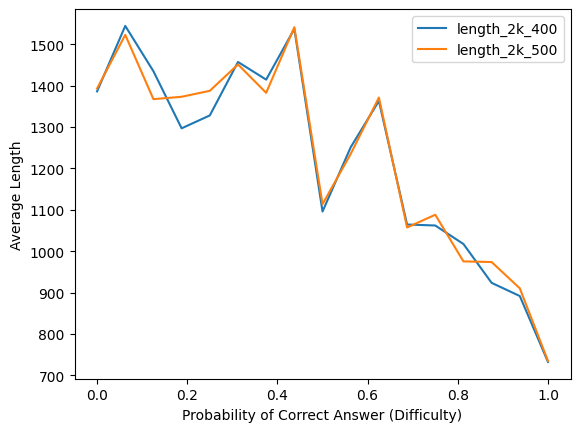

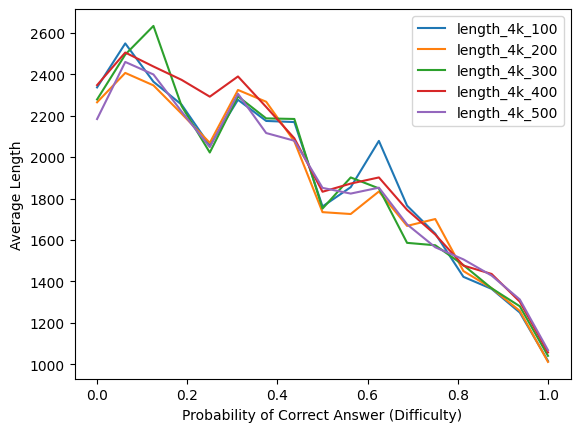

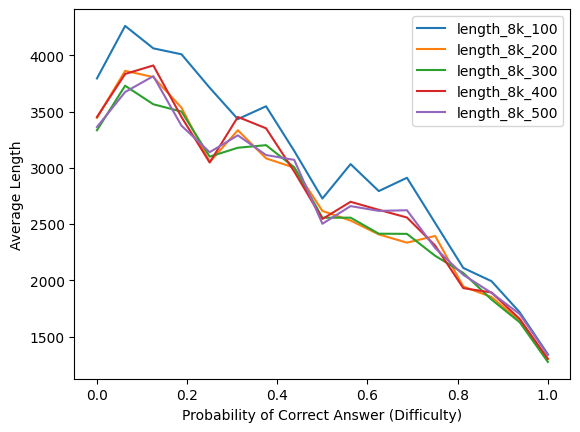

In [14]:
for context_length in ['2k', '4k', '8k']:
    for checkpoint in [100, 200, 300, 400, 500]:
        if context_length == '2k' and checkpoint < 400:
            continue
        plot_length_vs_reward(dataset, f'length_{context_length}_{checkpoint}')

    plt.xlabel('Probability of Correct Answer (Difficulty)')
    plt.ylabel('Average Length')
    plt.legend()
    plt.show()